In [1]:
# This notebook transport data and output between R and python

import scanpy as sc
import numpy as np
import pandas as pd

# DG

# 读取.h5ad文件
adata = sc.read_h5ad('DG_bin_ppt.h5ad')

# 提取数据并转换为DataFrame（带行列名）
# (1) 表达矩阵 X（细胞×基因）
X_df = pd.DataFrame(
    adata.X.toarray(),
    index=adata.obs_names,  # 细胞名作为行名
    columns=adata.var_names  # 基因名作为列名
)
X_df.to_csv('X.csv')  # 保存为CSV（自动包含行列名）

# (2) PCA坐标（细胞×PCs）
X_pca_df = pd.DataFrame(
    adata.obsm['X_pca'],
    index=adata.obs_names,
    columns=[f"PC_{i+1}" for i in range(adata.obsm['X_pca'].shape[1])]  # 列名：PC_1, PC_2, ...
)
X_pca_df.to_csv('pca.csv')

# (3) UMAP坐标（细胞×UMAP维度）
X_umap_df = pd.DataFrame(
    adata.obsm['X_umap'],
    index=adata.obs_names,
    columns=[f"UMAP_{i+1}" for i in range(adata.obsm['X_umap'].shape[1])]  # 列名：UMAP_1, UMAP_2
)
X_umap_df.to_csv('umap.csv')

# (4) 聚类标签（细胞×ClusterName）
ClusterName_df = pd.DataFrame(
    adata.obs['ClusterName'],
    index=adata.obs_names,
    columns=['ClusterName']  # 列名
)
ClusterName_df.to_csv('ClusterName.csv')

# (5) 其他聚类信息（如Clusters）
Clusters_df = pd.DataFrame(
    adata.obs['Clusters'],
    index=adata.obs_names,
    columns=['Clusters']
)
Clusters_df.to_csv('Clusters.csv')

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd

# A549

# 读取.h5ad文件
adata = sc.read_h5ad('A549_emt_bin_ppt.h5ad')

# 提取数据并转换为DataFrame（带行列名）
# (1) 表达矩阵 X（细胞×基因）
X_df = pd.DataFrame(
    adata.X.toarray(),
    index=adata.obs_names,  # 细胞名作为行名
    columns=adata.var_names  # 基因名作为列名
)
X_df.to_csv('X.csv')  # 保存为CSV（自动包含行列名）

# (2) PCA坐标（细胞×PCs）
X_pca_df = pd.DataFrame(
    adata.obsm['X_pca'],
    index=adata.obs_names,
    columns=[f"PC_{i+1}" for i in range(adata.obsm['X_pca'].shape[1])]  # 列名：PC_1, PC_2, ...
)
X_pca_df.to_csv('pca.csv')

# (3) UMAP坐标（细胞×UMAP维度）
X_umap_df = pd.DataFrame(
    adata.obsm['X_umap'],
    index=adata.obs_names,
    columns=[f"UMAP_{i+1}" for i in range(adata.obsm['X_umap'].shape[1])]  # 列名：UMAP_1, UMAP_2
)
X_umap_df.to_csv('umap.csv')

# (4) 聚类标签（细胞×ClusterName）
ClusterName_df = pd.DataFrame(
    adata.obs['sample'].tolist(),
    index=adata.obs_names,
    columns=['ClusterName']  # 列名
)
ClusterName_df.to_csv('ClusterName.csv')

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd

# EG

# 读取.h5ad文件
adata = sc.read_h5ad('EG_bin_ppt.h5ad')

# 提取数据并转换为DataFrame（带行列名）
# (1) 表达矩阵 X（细胞×基因）
X_df = pd.DataFrame(
    adata.X.toarray(),
    index=adata.obs_names,  # 细胞名作为行名
    columns=adata.var_names  # 基因名作为列名
)
X_df.to_csv('X.csv')  # 保存为CSV（自动包含行列名）

# (2) PCA坐标（细胞×PCs）
X_pca_df = pd.DataFrame(
    adata.obsm['X_pca'],
    index=adata.obs_names,
    columns=[f"PC_{i+1}" for i in range(adata.obsm['X_pca'].shape[1])]  # 列名：PC_1, PC_2, ...
)
X_pca_df.to_csv('pca.csv')

# (3) UMAP坐标（细胞×UMAP维度）
X_umap_df = pd.DataFrame(
    adata.obsm['X_umap'],
    index=adata.obs_names,
    columns=[f"UMAP_{i+1}" for i in range(adata.obsm['X_umap'].shape[1])]  # 列名：UMAP_1, UMAP_2
)
X_umap_df.to_csv('umap.csv')

# (4) 聚类标签（细胞×ClusterName）
ClusterName_df = pd.DataFrame(
    adata.obs['clusters'],
    index=adata.obs_names,
    columns=['clusters']  # 列名
)
ClusterName_df.to_csv('ClusterName.csv')

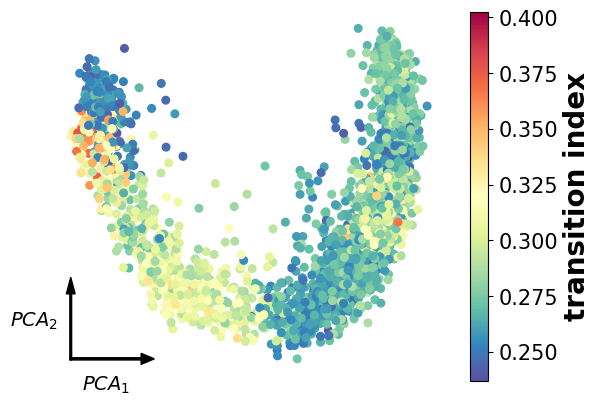

In [6]:
# DG transition index
adata = sc.read('DG_bin_ppt.h5ad')
transition_index = np.loadtxt("DG/transition_index.csv", delimiter=",")

import matplotlib.pyplot as plt

X_umap = adata.obsm['X_pca']
X_pca = adata.obsm['X_pca']
X_plt = -X_pca[:,0]
Y_plt = X_pca[:,1]
X_min = np.min(X_plt)
X_max = np.max(X_plt)
Y_min = np.min(Y_plt)
Y_max = np.max(Y_plt)
X_len = (X_max-X_min)/5
Y_len = (Y_max-Y_min)/5
wid = min(X_len,Y_len)/30
X_ori = X_min
Y_ori = Y_min

cmap = plt.colormaps['Spectral_r']
plt.scatter(X_plt,Y_plt,c=transition_index,s=30,cmap=cmap)
plt.axis('off')

clb=plt.colorbar()
clb.ax.set_ylabel('transition index',fontsize=20,weight='bold')
clb.ax.tick_params(axis='y', labelsize=15)
# plt.savefig(figure_path+'5c1.png',dpi=600,bbox_inches='tight')

plt.arrow(X_ori-wid/2,Y_ori,X_len,0,width=wid,color='black',head_width=5*wid)
plt.arrow(X_ori,Y_ori-wid/2,0,Y_len,width=wid,color='black',head_width=5*wid)
plt.text(X_ori+X_len/2,Y_ori-wid*14,'$PCA_1$',fontsize=14,ha='center',weight='bold')
plt.text(X_ori-wid*21,Y_ori+Y_len/2,'$PCA_2$',fontsize=14,ha='center',weight='bold')

plt.savefig('DG/transition_index.png', dpi=600, bbox_inches='tight')
plt.show()

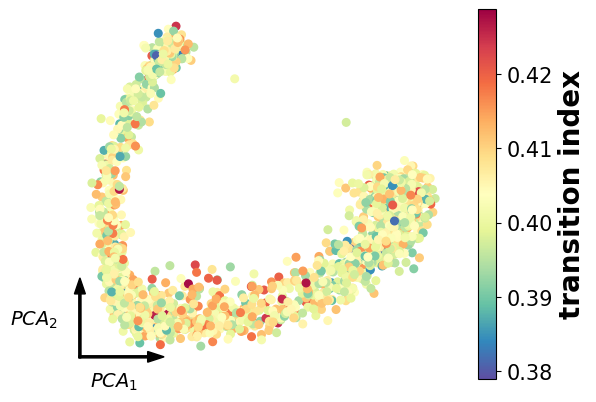

In [5]:
# EG single transition index
import scanpy as sc
import numpy as np

adata = sc.read('EG_bin_ppt.h5ad')
transition_index = np.loadtxt("EG_single/transition_index.csv", delimiter=",")

import matplotlib.pyplot as plt

X_pca = adata.obsm['X_pca']
X_plt = -X_pca[:,0]
Y_plt = X_pca[:,1]
X_min = np.min(X_plt)
X_max = np.max(X_plt)
Y_min = np.min(Y_plt)
Y_max = np.max(Y_plt)
X_len = (X_max-X_min)/5
Y_len = (Y_max-Y_min)/5
wid = min(X_len,Y_len)/30
X_ori = X_min - wid*5
Y_ori = Y_min - wid*5

cmap = plt.colormaps['Spectral_r']
plt.scatter(X_plt,Y_plt,c=transition_index,s=30,cmap=cmap)
plt.axis('off')

clb=plt.colorbar()
clb.ax.set_ylabel('transition index',fontsize=20,weight='bold')
clb.ax.tick_params(axis='y', labelsize=15)
# plt.savefig(figure_path+'5c1.png',dpi=600,bbox_inches='tight')

plt.arrow(X_ori-wid/2,Y_ori,X_len,0,width=wid,color='black',head_width=5*wid)
plt.arrow(X_ori,Y_ori-wid/2,0,Y_len,width=wid,color='black',head_width=5*wid)
plt.text(X_ori+X_len/2,Y_ori-wid*14,'$PCA_1$',fontsize=14,ha='center',weight='bold')
plt.text(X_ori-wid*21,Y_ori+Y_len/2,'$PCA_2$',fontsize=14,ha='center',weight='bold')

plt.savefig('EG_single/transition_index.png', dpi=600, bbox_inches='tight')
plt.show()

/home/sirin/anaconda3/envs/CPT2025/lib/python3.9/site-packages/anndata/compat/__init__.py:329: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


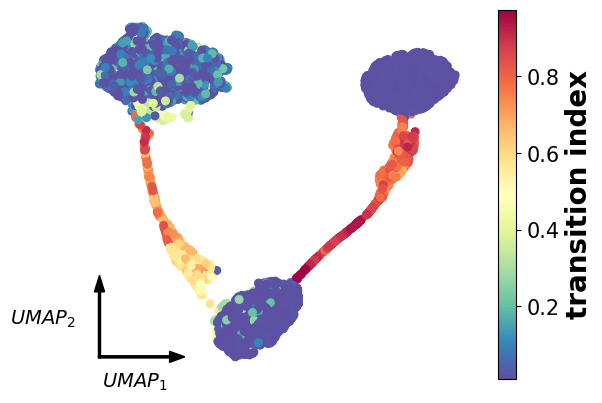

In [2]:
# celltran transition index
import scanpy as sc
import numpy as np
adata = sc.read('celltran_data.h5ad')
transition_index = np.loadtxt("celltran_data/transition_index.csv", delimiter=",")

import matplotlib.pyplot as plt

X_umap = adata.obsm['X_umap']
X_pca = adata.obsm['X_pca']
X_plt = X_umap[:,0]
Y_plt = X_umap[:,1]
X_min = np.min(X_plt)
X_max = np.max(X_plt)
Y_min = np.min(Y_plt)
Y_max = np.max(Y_plt)
X_len = (X_max-X_min)/5
Y_len = (Y_max-Y_min)/5
wid = min(X_len,Y_len)/30
X_ori = X_min
Y_ori = Y_min

cmap = plt.colormaps['Spectral_r']
plt.scatter(X_plt,Y_plt,c=transition_index,s=30,cmap=cmap)
plt.axis('off')

clb=plt.colorbar()
clb.ax.set_ylabel('transition index',fontsize=20,weight='bold')
clb.ax.tick_params(axis='y', labelsize=15)
# plt.savefig(figure_path+'5c1.png',dpi=600,bbox_inches='tight')

plt.arrow(X_ori-wid/2,Y_ori,X_len,0,width=wid,color='black',head_width=5*wid)
plt.arrow(X_ori,Y_ori-wid/2,0,Y_len,width=wid,color='black',head_width=5*wid)
plt.text(X_ori+X_len/2,Y_ori-wid*14,'$UMAP_1$',fontsize=14,ha='center',weight='bold')
plt.text(X_ori-wid*28,Y_ori+Y_len/2,'$UMAP_2$',fontsize=14,ha='center',weight='bold')

plt.savefig('celltran_data/transition_index.png', dpi=600, bbox_inches='tight')
plt.show()

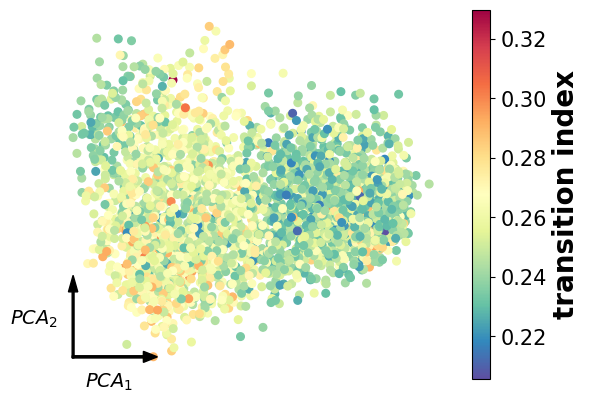

In [14]:
# A549 transition index
import scanpy as sc
import numpy as np
adata = sc.read('A549_emt_bin_ppt.h5ad')
transition_index = np.loadtxt("A549/transition_index.csv", delimiter=",")

import matplotlib.pyplot as plt

X_umap = adata.obsm['X_pca']
X_pca = adata.obsm['X_pca']
X_plt = -X_pca[:,0]
Y_plt = X_pca[:,1]
X_min = np.min(X_plt)
X_max = np.max(X_plt)
Y_min = np.min(Y_plt)
Y_max = np.max(Y_plt)
X_len = (X_max-X_min)/5
Y_len = (Y_max-Y_min)/5
wid = min(X_len,Y_len)/30
X_ori = X_min
Y_ori = Y_min

cmap = plt.colormaps['Spectral_r']
plt.scatter(X_plt,Y_plt,c=transition_index,s=30,cmap=cmap)
plt.axis('off')

clb=plt.colorbar()
clb.ax.set_ylabel('transition index',fontsize=20,weight='bold')
clb.ax.tick_params(axis='y', labelsize=15)
# plt.savefig(figure_path+'5c1.png',dpi=600,bbox_inches='tight')

plt.arrow(X_ori-wid/2,Y_ori,X_len,0,width=wid,color='black',head_width=5*wid)
plt.arrow(X_ori,Y_ori-wid/2,0,Y_len,width=wid,color='black',head_width=5*wid)
plt.text(X_ori+X_len/2,Y_ori-wid*14,'$PCA_1$',fontsize=14,ha='center',weight='bold')
plt.text(X_ori-wid*21,Y_ori+Y_len/2,'$PCA_2$',fontsize=14,ha='center',weight='bold')

plt.savefig('A549/transition_index.png', dpi=600, bbox_inches='tight')
plt.show()